In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing & Splitting
from sklearn.model_selection import train_test_split, cross_validate

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Models (Classification & Regression)
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor
from sklearn.svm import SVC, SVR
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier, XGBRegressor

# Pipeline
from sklearn.pipeline import make_pipeline

# Evaluation Metrics
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, r2_score,
    classification_report, confusion_matrix,
    accuracy_score, precision_score,confusion_matrix, recall_score, f1_score, roc_auc_score
)


In [2]:
import gc

gc.collect() 

4

In [3]:
df = pd.read_csv("E:\VE_project\datasets\EV_Predictv_data.csv",parse_dates=['Timestamp'])
df.head()


,Timestamp,SoC,SoH,Battery_Voltage,Battery_Current,Battery_Temperature,Charge_Cycles,Motor_Temperature,Motor_Vibration,Motor_Torque,...,Load_Weight,Driving_Speed,Distance_Traveled,Idle_Time,Route_Roughness,RUL,Failure_Probability,Maintenance_Type,TTF,Component_Health_Score
0,01/01/2020 0:00,0.826099,0.941338,210.163881,-22.753095,27.149201,149.190930,48.496049,0.369095,113.435589,...,741.754518,103.421162,66.232383,0.520922,0.225970,260.503381,0,1,111.116697,0.852745
1,01/01/2020 0:15,0.064728,0.916059,364.000102,-27.701120,53.655101,171.702388,57.829492,1.449195,105.587160,...,769.134035,46.041935,3.146238,0.844005,0.204350,212.813954,0,2,179.229425,0.827616
2,01/01/2020 0:30,0.873643,0.908020,388.855089,-36.646406,29.559090,191.617645,46.518363,1.859045,119.610302,...,917.262931,59.588422,79.909148,0.992405,0.175125,273.394512,0,1,171.852663,0.876887
3,01/01/2020 0:45,0.853009,0.916476,370.570602,-37.609429,29.690283,111.881817,54.163681,0.381500,182.535625,...,600.598736,44.222285,0.774000,0.007615,0.213264,229.508442,0,0,165.221328,0.816290
4,01/01/2020 1:00,0.947540,0.913206,390.011904,-14.275808,28.864338,163.774377,42.075978,0.433927,173.298044,...,613.153030,41.374684,2.872124,0.771938,0.770257,257.302631,1,0,176.890659,0.744260


In [4]:
print(df.shape)           
print(df.columns.tolist()) 

(175393, 30)
['Timestamp', 'SoC', 'SoH', 'Battery_Voltage', 'Battery_Current', 'Battery_Temperature', 'Charge_Cycles', 'Motor_Temperature', 'Motor_Vibration', 'Motor_Torque', 'Motor_RPM', 'Power_Consumption', 'Brake_Pad_Wear', 'Brake_Pressure', 'Reg_Brake_Efficiency', 'Tire_Pressure', 'Tire_Temperature', 'Suspension_Load', 'Ambient_Temperature', 'Ambient_Humidity', 'Load_Weight', 'Driving_Speed', 'Distance_Traveled', 'Idle_Time', 'Route_Roughness', 'RUL', 'Failure_Probability', 'Maintenance_Type', 'TTF', 'Component_Health_Score']


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175393 entries, 0 to 175392
Data columns (total 30 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Timestamp               175393 non-null  object 
 1   SoC                     175393 non-null  float64
 2   SoH                     175393 non-null  float64
 3   Battery_Voltage         175393 non-null  float64
 4   Battery_Current         175393 non-null  float64
 5   Battery_Temperature     175393 non-null  float64
 6   Charge_Cycles           175393 non-null  float64
 7   Motor_Temperature       175393 non-null  float64
 8   Motor_Vibration         175393 non-null  float64
 9   Motor_Torque            175393 non-null  float64
 10  Motor_RPM               175393 non-null  float64
 11  Power_Consumption       175393 non-null  float64
 12  Brake_Pad_Wear          175393 non-null  float64
 13  Brake_Pressure          175393 non-null  float64
 14  Reg_Brake_Efficiency

In [6]:
df.describe()

,SoC,SoH,Battery_Voltage,Battery_Current,Battery_Temperature,Charge_Cycles,Motor_Temperature,Motor_Vibration,Motor_Torque,Motor_RPM,...,Load_Weight,Driving_Speed,Distance_Traveled,Idle_Time,Route_Roughness,RUL,Failure_Probability,Maintenance_Type,TTF,Component_Health_Score
count,175393.000000,175393.000000,175393.000000,175393.000000,175393.000000,175393.000000,175393.000000,175393.000000,175393.000000,175393.000000,...,175393.000000,175393.000000,175393.000000,175393.000000,175393.000000,175393.000000,175393.000000,175393.000000,175393.000000,175393.000000
mean,0.779882,0.882219,352.713482,-47.892493,33.399346,217.685124,56.027332,0.523942,179.786407,2235.503735,...,899.622755,58.254410,15.426523,1.554246,0.297452,216.366252,0.098818,0.498418,129.723870,0.744438
std,0.291660,0.164805,55.246513,45.358339,8.655192,164.506573,15.447305,0.434352,76.767046,1188.119583,...,384.992691,20.599544,25.663043,2.581281,0.240178,84.594382,0.298418,0.865544,55.178580,0.265023
min,0.000006,0.400001,200.001095,-199.994036,25.000010,100.000809,40.000182,0.200000,100.000039,1500.005873,...,500.001439,40.000040,0.000059,0.000005,0.100000,0.000148,0.000000,0.000000,0.000009,0.000005
25%,0.823508,0.911699,355.989733,-45.270093,27.948170,129.489301,45.872695,0.288583,129.469691,1646.972583,...,647.083998,45.906363,2.937620,0.293588,0.159248,211.700417,0.000000,0.000000,111.816152,0.735163
50%,0.882380,0.941193,370.587405,-33.518350,30.887664,158.901349,51.757365,0.376488,158.810055,1793.947006,...,793.026812,51.776604,5.881970,0.586629,0.217891,241.127447,0.000000,0.000000,141.216309,0.823212
75%,0.941148,0.970720,385.262527,-21.757595,33.826187,188.312590,57.678209,0.465118,188.025425,1941.249131,...,940.973233,57.669053,8.790443,0.882060,0.276479,270.516993,0.000000,1.000000,170.507963,0.911802
max,0.999999,0.999999,399.999314,-10.000173,59.997570,699.996920,99.999997,1.999954,399.998498,5999.999833,...,1999.971806,119.998280,99.999640,9.999459,0.999997,299.999891,1.000000,3.000000,199.998920,0.999999


In [7]:
df.isnull().sum()

Timestamp                 0
SoC                       0
SoH                       0
Battery_Voltage           0
Battery_Current           0
Battery_Temperature       0
Charge_Cycles             0
Motor_Temperature         0
Motor_Vibration           0
Motor_Torque              0
Motor_RPM                 0
Power_Consumption         0
Brake_Pad_Wear            0
Brake_Pressure            0
Reg_Brake_Efficiency      0
Tire_Pressure             0
Tire_Temperature          0
Suspension_Load           0
Ambient_Temperature       0
Ambient_Humidity          0
Load_Weight               0
Driving_Speed             0
Distance_Traveled         0
Idle_Time                 0
Route_Roughness           0
RUL                       0
Failure_Probability       0
Maintenance_Type          0
TTF                       0
Component_Health_Score    0
dtype: int64

In [8]:
def null_zero_summary(df):
    """
    Returns a summary DataFrame showing:
    - Count of null values
    - Count of zero values (for numeric columns only)
    - Percentage of total zeros for each column
    """
    total_rows = len(df)
    
    summary = pd.DataFrame(index=df.columns)
    
    # Null values
    summary['Null Count'] = df.isnull().sum()
    summary['Null %'] = 100 * summary['Null Count'] / total_rows
    
    # Zero values (only for numeric columns)
    zero_counts = {}
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            zero_counts[col] = (df[col] == 0).sum()
        else:
            zero_counts[col] = None
    summary['Zero Count'] = pd.Series(zero_counts)
    summary['Zero %'] = 100 * summary['Zero Count'] / total_rows
    
    return summary


In [9]:
summary_df = null_zero_summary(df)
display(summary_df.sort_values(by='Null Count', ascending=False))


,Null Count,Null %,Zero Count,Zero %
Timestamp,0,0.0,NaN,NaN
SoC,0,0.0,0.0,0.000000
TTF,0,0.0,0.0,0.000000
Maintenance_Type,0,0.0,122958.0,70.104280
Failure_Probability,0,0.0,158061.0,90.118192
RUL,0,0.0,0.0,0.000000
Route_Roughness,0,0.0,0.0,0.000000
Idle_Time,0,0.0,0.0,0.000000
Distance_Traveled,0,0.0,0.0,0.000000
Driving_Speed,0,0.0,0.0,0.000000


In [ ]:
# Converting Timestamp to datetime for time-based analysis
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format="%d/%m/%Y %H:%M")


In [11]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['hour'] = df['Timestamp'].dt.hour
df['day_of_week'] = df['Timestamp'].dt.dayofweek
df['month'] = df['Timestamp'].dt.month

In [12]:
df.head(1)

,Timestamp,SoC,SoH,Battery_Voltage,Battery_Current,Battery_Temperature,Charge_Cycles,Motor_Temperature,Motor_Vibration,Motor_Torque,...,Idle_Time,Route_Roughness,RUL,Failure_Probability,Maintenance_Type,TTF,Component_Health_Score,hour,day_of_week,month
0,2020-01-01,0.826099,0.941338,210.163881,-22.753095,27.149201,149.19093,48.496049,0.369095,113.435589,...,0.520922,0.22597,260.503381,0,1,111.116697,0.852745,0,2,1


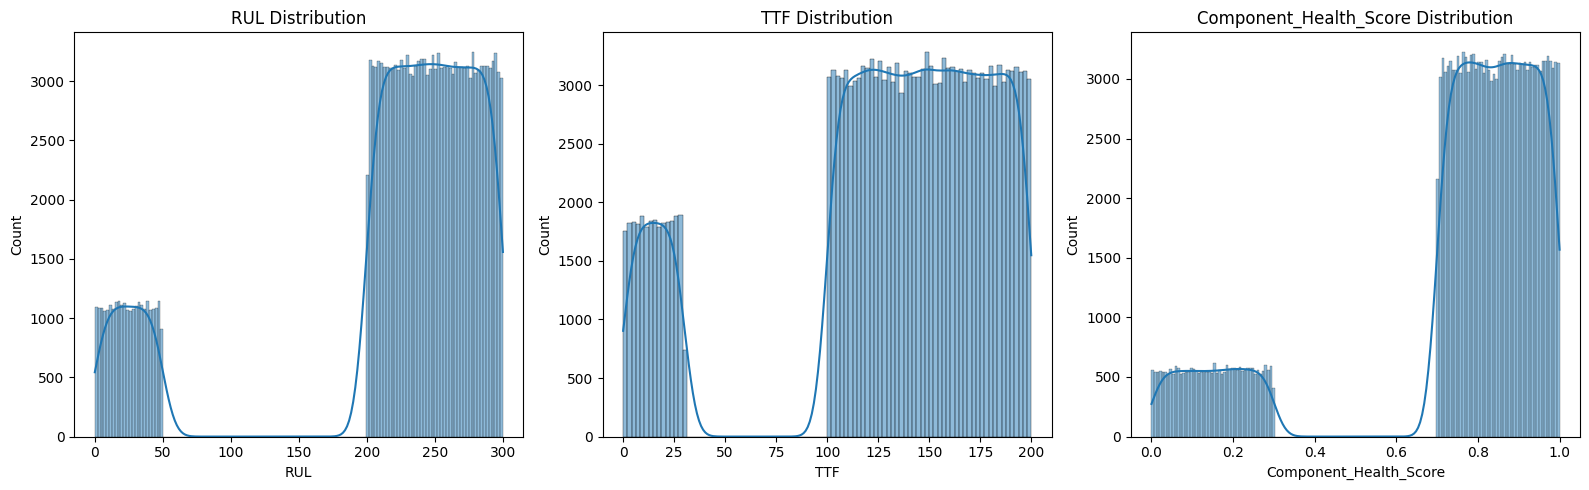

In [13]:
plt.figure(figsize=(16, 5))
for i, col in enumerate(['RUL', 'TTF', 'Component_Health_Score']):
    plt.subplot(1, 3, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f"{col} Distribution")
plt.tight_layout()
plt.show()


## Target Variable Distribution

#### 1. Remaining Useful Life (RUL)
- Vehicles/components nearing end-of-life (RUL ≈ 0–50 days).

- Vehicles/components with a long remaining life (RUL ≈ 200–300 days).

#### 2. Time to Failure (TTF)
- Shows that while most components have sufficient life left, some will fail imminently.

#### 3. Component Health Score
- Low health score (≈ 0.0–0.3): Potentially failing components.

- High health score (≈ 0.7–1.0): Healthy components.


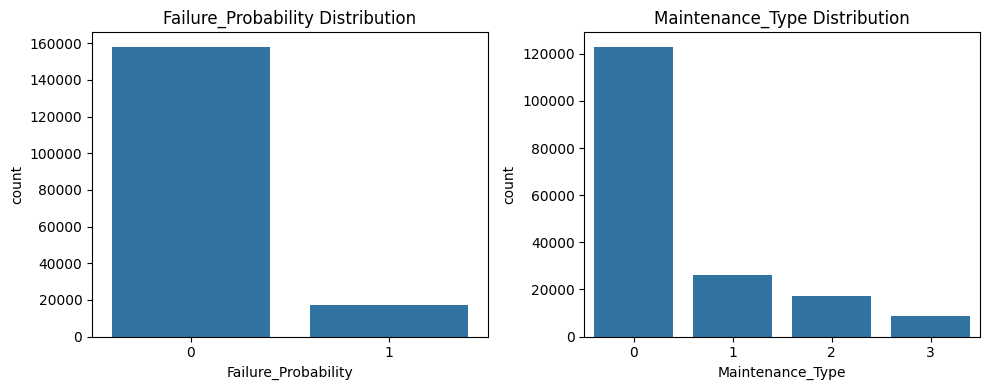

In [24]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.countplot(x='Failure_Probability', data=df)
plt.title("Failure_Probability Distribution")
plt.subplot(1, 2, 2)
sns.countplot(x='Maintenance_Type', data=df)
plt.title("Maintenance_Type Distribution")
plt.tight_layout()
plt.show()


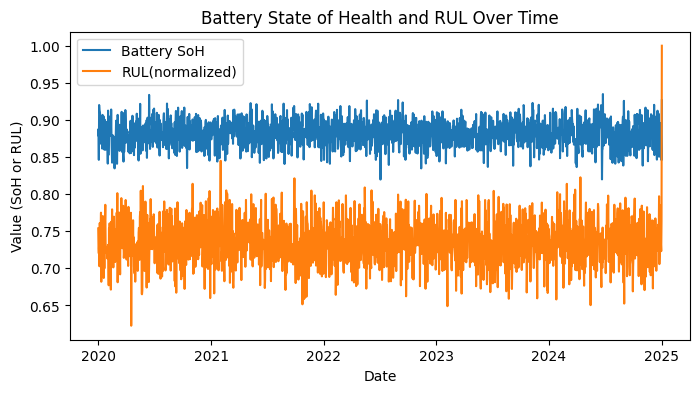

In [ ]:
# Battery SoH and RUL over time
df_sorted = df.sort_values('Timestamp')
df_daily = df_sorted.resample('1D', on='Timestamp').mean().dropna()
plt.figure(figsize=(8,4))
plt.plot(df_daily.index, df_daily['SoH'], label='Battery SoH')
plt.plot(df_daily.index, df_daily['RUL']/df_daily['RUL'].max(), label='RUL(normalized)')
plt.xlabel("Date")
plt.ylabel("Value (SoH or RUL)")
plt.title("Battery State of Health and RUL Over Time")
plt.legend()
plt.show()


###  Battery State of Health (SoH) and RUL Over Time

The following time-series plot shows the relationship between:

* **Battery State of Health (SoH)** – blue line
* **Normalized Remaining Useful Life (RUL)** – orange line
* **Timeframe**: 2020 to early 2025

####  Observations:

* **Battery SoH**:

  * Remains relatively stable over the observed period, fluctuating between **0.87 and 0.92**.
  * Minor dips are visible, reflecting normal degradation or performance drops due to usage patterns.
  * Overall high SoH values suggest good battery maintenance or newer battery systems.

* **Normalized RUL**:

  * Tends to stay between **0.65 and 0.80**, tracking slightly below SoH values.
  * Exhibits higher **volatility**, with occasional sharp drops or spikes.
  * This indicates RUL is more responsive to short-term operational factors.


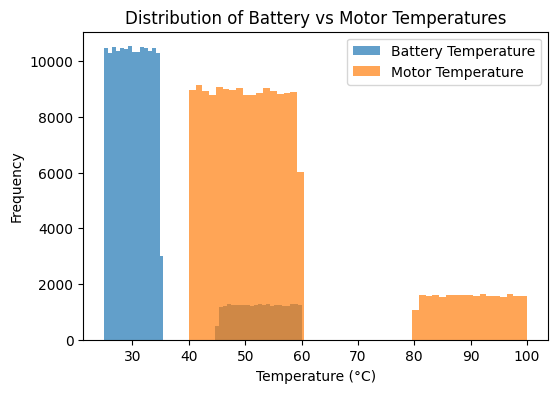

In [ ]:
#Distribution of Battery and Motor Temperatures
plt.figure(figsize=(6,4))
plt.hist(df['Battery_Temperature'], bins=50, alpha=0.7, label='Battery Temperature')
plt.hist(df['Motor_Temperature'], bins=50, alpha=0.7, label='Motor Temperature')
plt.xlabel("Temperature (°C)")
plt.ylabel("Frequency")
plt.title("Distribution of Battery vs Motor Temperatures")
plt.legend()
plt.show()


###  Battery vs Motor Temperature Distribution


* The motor experiences **greater thermal variability**, which is expected due to its mechanical nature and high torque demands.
* Batteries are maintained in a **tighter thermal envelope** to ensure longevity and safety.
* The **absence of high battery temps** indicates good cooling efficiency, while **high motor temps** may warrant monitoring or design optimization for peak-load scenarios.


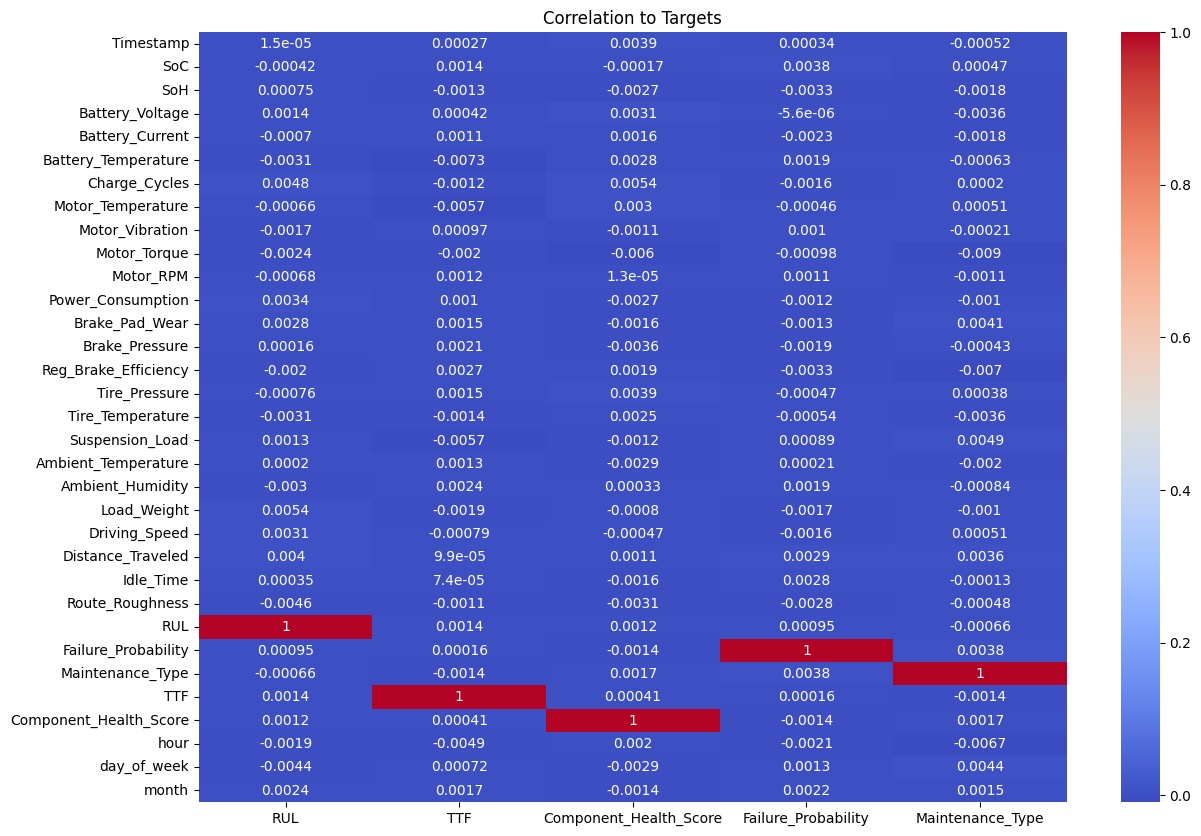

In [ ]:
#correlation analysis
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr()[['RUL', 'TTF', 'Component_Health_Score', 'Failure_Probability', 'Maintenance_Type']], annot=True, cmap='coolwarm')
plt.title("Correlation to Targets")
plt.show()

The low correlation coefficients imply that the target variables are influenced by complex, nonlinear relationships across multiple features

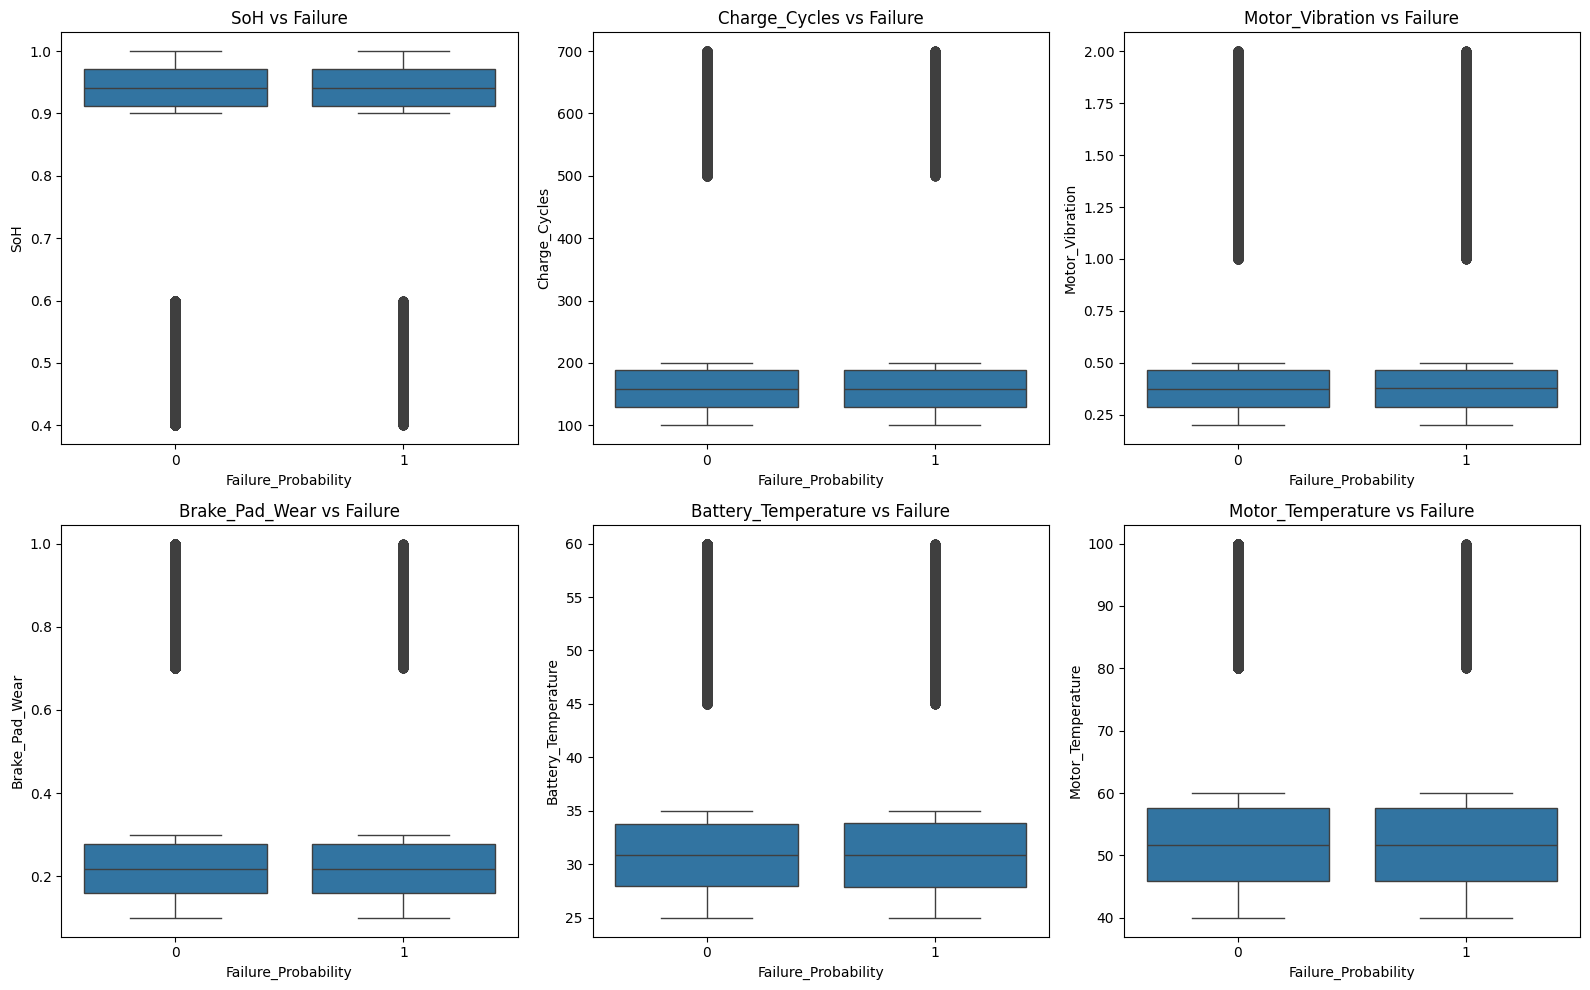

In [18]:
features = ['SoH', 'Charge_Cycles', 'Motor_Vibration', 'Brake_Pad_Wear', 'Battery_Temperature', 'Motor_Temperature']
plt.figure(figsize=(16, 10))
for i, col in enumerate(features):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='Failure_Probability', y=col, data=df)
    plt.title(f"{col} vs Failure")
plt.tight_layout()
plt.show()

 Static values alone don’t show strong separation between failure and non-failure cases.
- **SoH** and **Motor_Vibration** are the most promising features, especially when considered in time-series or trend-based analysis.

#### Feature Engineering

Raw sensor readings are not very helpful in directly indicating component health, so feature engineering
is used to derive more informative indicators. We will create new features and aggregate statistics that can help the models learn patterns more effectively


In [25]:
df_fe = df.copy()

In [ ]:
# Selecting feature columns 
target_cols = ['RUL', 'Failure_Probability', 'Maintenance_Type', 'TTF','Component_Health_Score']
feature_cols = [col for col in df.columns if col not in target_cols + ['Timestamp']]
X = df[feature_cols].copy()
y_rul = df['RUL'].values # remaining useful life
y_fail = df['Failure_Probability'].values # failure probability 
y_health = df['Component_Health_Score'].values # health score 

In [27]:
# Temperature stress
df_fe['Batt_Temp_Rise'] = df_fe['Battery_Temperature'] - df_fe['Ambient_Temperature']
df_fe['Motor_Temp_Rise'] = df_fe['Motor_Temperature'] - df_fe['Ambient_Temperature']

# Energy usage per km
df_fe['Energy_per_km'] = df_fe['Power_Consumption'] / (df_fe['Distance_Traveled'] + 1e-5)

# Torque efficiency
df_fe['Torque_per_RPM'] = df_fe['Motor_Torque'] / (df_fe['Motor_RPM'] + 1e-5)

# Brake usage stress
df_fe['Brake_Stress'] = df_fe['Brake_Pressure'] * df_fe['Brake_Pad_Wear']


In [ ]:
# Sort by time
df_fe = df_fe.sort_values(by='Timestamp')

# 1-hour rolling avg for temperature 
df_fe['MotorTemp_1h_avg'] = df_fe['Motor_Temperature'].rolling(window=4).mean().fillna(method='bfill')


In [29]:
# Total kilometers covered
df_fe['Total_Distance'] = df_fe['Distance_Traveled'].cumsum()


In [30]:
df_fe = df_fe.drop(columns=['Timestamp'])

In [31]:
df_fe.head(1)

,SoC,SoH,Battery_Voltage,Battery_Current,Battery_Temperature,Charge_Cycles,Motor_Temperature,Motor_Vibration,Motor_Torque,Motor_RPM,...,hour,day_of_week,month,Batt_Temp_Rise,Motor_Temp_Rise,Energy_per_km,Torque_per_RPM,Brake_Stress,MotorTemp_1h_avg,Total_Distance
0,0.826099,0.941338,210.163881,-22.753095,27.149201,149.19093,48.496049,0.369095,113.435589,1996.008632,...,0,2,1,13.936162,35.28301,0.430172,0.056831,10.966506,51.751896,66.232383


### RUL Prediction

In [ ]:

# Defining target and features
X = df_fe.drop(columns=['RUL']) 
y = df['RUL']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:

# SVR is wrapped in a pipeline with StandardScaler
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Random Forest': RandomForestRegressor(n_estimators=40,max_depth=12, random_state=42),
    'XGBoost': XGBRegressor(objective='reg:squarederror', random_state=42),
    'SVR (scaled)': make_pipeline(StandardScaler(), SVR(kernel='rbf', C=1.0, epsilon=0.1))
    }

# Training each model
for name, model in models.items():
    model.fit(X_train, y_train)  # Fit model
    print(f"{name} trained.")


Linear Regression trained.
Ridge Regression trained.


In [ ]:

metrics_list = []
for name, model in models.items():
    # Predicting on test set
    y_pred = model.predict(X_test)
    
    # Computing metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    n = len(y_test)
    p = X_test.shape[1]  # number of features
    # Adjusted R^2 formula
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    
    metrics_list.append([name, mae, rmse, r2, adj_r2])

# Creating a DataFrame for easy viewing
metrics_df = pd.DataFrame(metrics_list, columns=['Model', 'MAE', 'RMSE', 'R2', 'Adj R2'])
metrics_df.set_index('Model', inplace=True)
display(metrics_df)


,MAE,RMSE,R2,Adj R2
Model,,,,
Linear Regression,59.741334,85.237199,-0.000235,-0.000663
Ridge Regression,59.741334,85.237199,-0.000236,-0.000663
Random Forest,59.755846,85.279364,-0.001225,-0.001654
XGBoost,61.077243,86.377667,-0.027181,-0.027620
SVR (scaled),54.834719,89.090224,-0.092708,-0.093175


- All models exhibit **negative R² values**, indicating they perform **worse than a horizontal mean line (baseline model)**.
- **SVR** has the **lowest MAE**, but the worst R² — suggesting it might predict average-like values consistently without learning actual patterns.
- **Linear and Ridge Regression** perform similarly — likely due to minimal regularization impact.
- **XGBoost and Random Forest** did not show meaningful performance gain, which suggests the data may lack strong predictive signals.




In [ ]:
maintenance_counts = df_fe['Maintenance_Type'].value_counts()
maintenance_counts

Maintenance_Type
0    122958
1     26242
2     17402
3      8791
Name: count, dtype: int64

In [ ]:
failure_counts = df_fe['Failure_Probability'].value_counts()
failure_counts

Failure_Probability
0    158061
1     17332
Name: count, dtype: int64

### Maintenance type Prediction

In [ ]:
X = df_fe.drop(columns=['Maintenance_Type','Timestamp'])
y = df_fe['Maintenance_Type']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
models = {
    "Logistic Regression": make_pipeline(StandardScaler(), LogisticRegression(max_iter=100,class_weight='balanced')),
    "Random Forest": RandomForestClassifier(n_estimators=40, random_state=42,class_weight='balanced'),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42,cale_pos_weight='ratio_for_each_class'),
    "KNN": make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=5))
}

Training Logistic Regression...

Logistic Regression Classification Report:

              precision    recall  f1-score   support

           0       0.70      0.19      0.30     24592
           1       0.15      0.26      0.19      5249
           2       0.10      0.30      0.15      3480
           3       0.05      0.28      0.09      1758

    accuracy                           0.22     35079
   macro avg       0.25      0.26      0.18     35079
weighted avg       0.53      0.22      0.26     35079



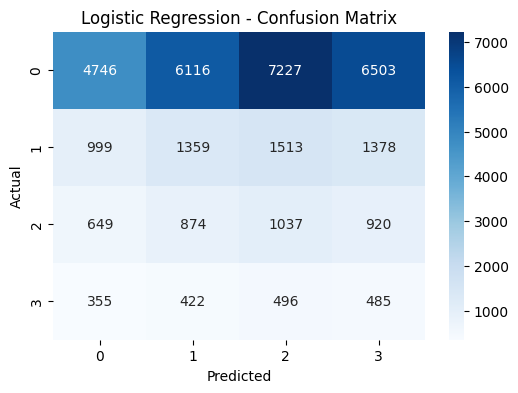

Training Random Forest...

Random Forest Classification Report:

              precision    recall  f1-score   support

           0       0.70      1.00      0.82     24592
           1       0.00      0.00      0.00      5249
           2       0.00      0.00      0.00      3480
           3       0.00      0.00      0.00      1758

    accuracy                           0.70     35079
   macro avg       0.18      0.25      0.21     35079
weighted avg       0.49      0.70      0.58     35079



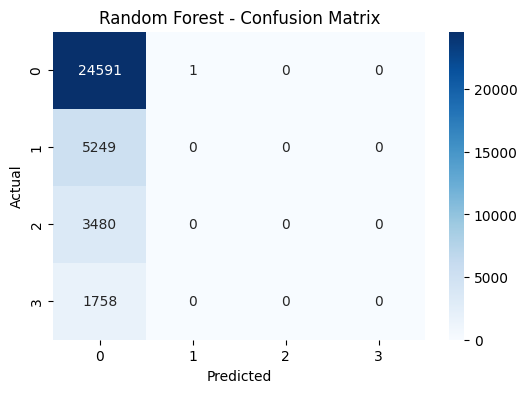

Training XGBoost...

XGBoost Classification Report:

              precision    recall  f1-score   support

           0       0.70      1.00      0.82     24592
           1       0.24      0.00      0.00      5249
           2       0.00      0.00      0.00      3480
           3       0.00      0.00      0.00      1758

    accuracy                           0.70     35079
   macro avg       0.23      0.25      0.21     35079
weighted avg       0.53      0.70      0.58     35079



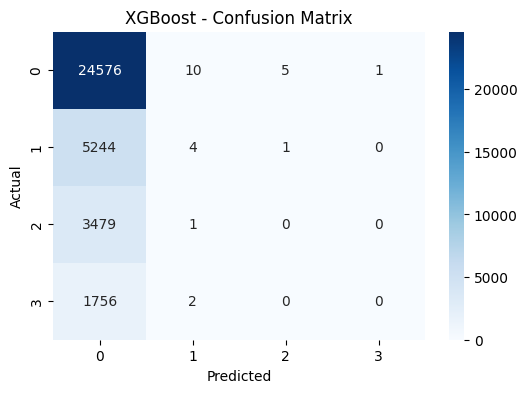

Training KNN...

KNN Classification Report:

              precision    recall  f1-score   support

           0       0.70      0.95      0.81     24592
           1       0.15      0.04      0.06      5249
           2       0.12      0.02      0.03      3480
           3       0.08      0.00      0.01      1758

    accuracy                           0.67     35079
   macro avg       0.26      0.25      0.23     35079
weighted avg       0.53      0.67      0.58     35079



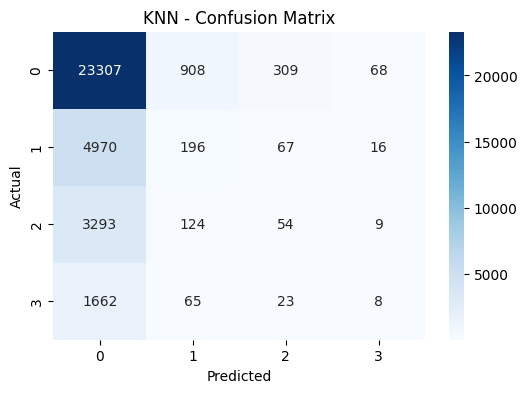

In [ ]:
# Storing results
results = []

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro')
    rec = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    results.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-Score': f1
    })
    print(f"\n{name} Classification Report:\n")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

### Failure Probabblity Prediction

In [ ]:
X = df.drop(columns=["Failure_Probability","Timestamp"])
y = df["Failure_Probability"]

# Standardize features (important for One-Class SVM)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
#one class SVM for anomaly detection
from sklearn.svm import OneClassSVM
oc_svm = OneClassSVM(nu=0.1, kernel='rbf', gamma='scale')
oc_svm.fit(X_scaled)

y_pred_ocsvm = oc_svm.predict(X_scaled)
y_pred_ocsvm = np.where(y_pred_ocsvm == -1, 1, 0)  # 1 = anomaly/failure

print("\nOne-Class SVM Results:")
print(classification_report(y, y_pred_ocsvm))
print("Confusion Matrix:\n", confusion_matrix(y, y_pred_ocsvm))
print("ROC AUC Score:", roc_auc_score(y, y_pred_ocsvm))



One-Class SVM Results:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90    158061
           1       0.10      0.10      0.10     17332

    accuracy                           0.82    175393
   macro avg       0.50      0.50      0.50    175393
weighted avg       0.82      0.82      0.82    175393

Confusion Matrix:
 [[142322  15739]
 [ 15527   1805]]
ROC AUC Score: 0.5022835730016757


#### Class-Wise Performance

| Model                | Accuracy | Class 0 (Majority) | Other Classes (1–3) |
|----------------------|----------|---------------------|----------------------|
| **KNN**              | 0.67     | Good (f1 ≈ 0.81)     | Weak (low f1, esp. for class 3) |
| **XGBoost**          | 0.70     | Very Good (f1 ≈ 0.82) | Predicts only class 0; ignores rest |
| **Random Forest**    | 0.70     | Very Good (f1 ≈ 0.82) | Fails on all minority classes |
| **Logistic Regression** | 0.22 | Poor for class 0     | Slight improvement for minority classes (esp. class 2 and 3) |
#### Key Insights:

- **All models are heavily biased toward the majority class (Class 0)** due to data imbalance.
- **XGBoost and Random Forest** show excellent recall for class 0, but completely **fail to identify classes 1, 2, and 3**.
- **KNN** attempts to predict other classes but with **very low precision and recall**, especially for classes 2 and 3.
- **Logistic Regression** shows **some coverage for minority classes**, but at the cost of overall accuracy.


### New Approach to handle this data

**Two Stage Modelling**

In [ ]:
# Separating features and RUL target
X = df.drop(columns=["RUL",'Timestamp'])       # ⬅️ replace 'RUL' if your column has a different name
y_rul = df["RUL"]


In [ ]:
# Spliting into train and test sets
X_train, X_test, y_rul_train, y_rul_test = train_test_split(
    X, y_rul, test_size=0.2, random_state=42
)


In [ ]:
# Defining segmenting logic
def segment_rul(y):
    return np.select(
        [y <= 50, y > 200],
        ['low', 'high'],
        default='mid'
    )

# Applying to training targets
rul_segment_train = segment_rul(y_rul_train)


In [39]:
clf_rul = RandomForestClassifier(random_state=42)
clf_rul.fit(X_train, rul_segment_train)


RandomForestClassifier(random_state=42)

In [40]:
def evaluate_models(models, X, y, cv=5):
    scoring = {
        'MAE': 'neg_mean_absolute_error',
        'RMSE': 'neg_root_mean_squared_error',
        'R2': 'r2'
    }
    results = []
    for name, model in models.items():
        cv_results = cross_validate(model, X, y, cv=cv, scoring=scoring)
        results.append({
            'Model': name,
            'MAE': -cv_results['test_MAE'].mean(),
            'RMSE': -cv_results['test_RMSE'].mean(),
            'R2': cv_results['test_R2'].mean()
        })
    return results


In [43]:
regressors = {
    'LinearReg': LinearRegression(),
    'RandForest': RandomForestRegressor(random_state=42,n_estimators=30, max_depth=10),
    'GradBoost': GradientBoostingRegressor(random_state=42)
}

segment_models = {}

def train_segment_models(X_train, y_train, segments):
    all_results = []
    for seg in ['low', 'mid', 'high']:
        X_seg = X_train[segments == seg]
        y_seg = y_train[segments == seg]

        if len(X_seg) < 10:
            print(f"Skipping segment '{seg}' due to too few samples.")
            continue

        results = evaluate_models(regressors, X_seg, y_seg)
        best_model_name = min(results, key=lambda r: r['RMSE'])['Model']
        best_model = regressors[best_model_name]
        best_model.fit(X_seg, y_seg)

        segment_models[seg] = best_model

        for r in results:
            r['Segment'] = seg
            all_results.append(r)
    return pd.DataFrame(all_results)

eval_rul = train_segment_models(X_train, y_rul_train, rul_segment_train)


Skipping segment 'mid' due to too few samples.


In [44]:
def predict_two_stage(X_new, classifier, models):
    seg_preds = classifier.predict(X_new)
    preds = np.zeros(len(X_new))
    for i, seg in enumerate(seg_preds):
        model = models.get(seg)
        if model:
            preds[i] = model.predict(X_new.iloc[i:i+1])[0]
        else:
            preds[i] = np.nan
    return preds


In [46]:
rul_preds = predict_two_stage(X_test, clf_rul, segment_models)

mae = mean_absolute_error(y_rul_test, rul_preds)
mse = mean_squared_error(y_rul_test, rul_preds)
rmse = np.sqrt(mse)
r2 = r2_score(y_rul_test, rul_preds)

print(f"Two-Stage RUL Prediction:")
print(f"MAE : {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²   : {r2:.2f}")


Two-Stage RUL Prediction:
MAE : 55.54
RMSE: 91.96
R²   : -0.16


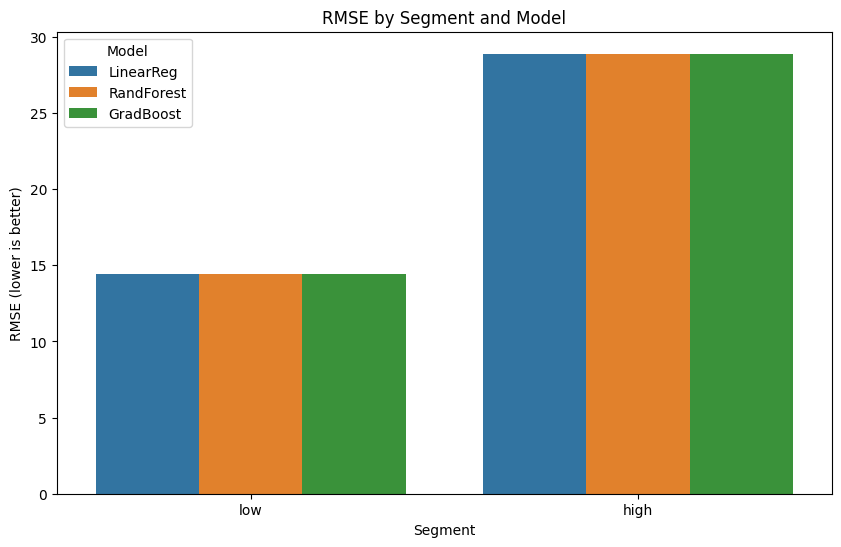

In [47]:
plt.figure(figsize=(10, 6))
sns.barplot(data=eval_rul, x='Segment', y='RMSE', hue='Model')
plt.title("RMSE by Segment and Model")
plt.ylabel("RMSE (lower is better)")
plt.show()


## Two-Stage RUL Prediction Results

- **MAE**  : 55.54  
- **RMSE** : 91.96  
- **R² Score** : -0.16  

---

###  Performance Summary

Despite employing a two-stage prediction strategy, the model's performance remained **sub-optimal**, as reflected in:

- A **high MAE** and **RMSE**, indicating large average errors in RUL prediction.
- A **negative R² score**, meaning the model performs worse than a naive mean-based baseline.

---
 *The Two-Stage RUL model did not perform well, largely due to data limitations. Improving the data quality and leveraging temporal patterns are essential for better predictions.*


### Prediction of Failure Probability

Since the data is highly imbalanced , we will try to sample the data for balanced dataset.

In [54]:
# Separate features and target
X = df.drop(columns=['Failure_Probability','Timestamp'])
y = df['Failure_Probability']

# Check class distribution
print("Class distribution:\n", y.value_counts(normalize=True))


Class distribution:
 Failure_Probability
0    0.901182
1    0.098818
Name: proportion, dtype: float64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

print("After SMOTE")
print(pd.Series(y_resampled).value_counts())


✅ After SMOTE
Failure_Probability
0    126448
1    126448
Name: count, dtype: int64


In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(X_resampled, y_resampled)

RandomForestClassifier(random_state=42)

In [57]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

In [ ]:

print(" Classification Report:")
print(classification_report(y_test, y_pred))

print(" Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("ROC AUC Score:", roc_auc_score(y_test, y_prob))

 Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94     31613
           1       0.11      0.02      0.04      3466

    accuracy                           0.88     35079
   macro avg       0.51      0.50      0.49     35079
weighted avg       0.82      0.88      0.85     35079

 Confusion Matrix:
[[30951   662]
 [ 3385    81]]
ROC AUC Score: 0.5010617897357156


### Classification After Balanced Sampling

Despite applying **balanced sampling techniques** to address class imbalance, the model still struggled to generalize well to the minority class.

####  Evaluation Metrics

| Metric               | Value       |
|----------------------|-------------|
| **Accuracy**         | 88%         |
| **ROC AUC Score**    | 0.501       |
| **Macro F1-score**   | 0.49        |
| **Class 0 F1-score** | 0.94        |
| **Class 1 F1-score** | 0.04        |



- The model **correctly classified most of the majority class (Class 0)**.
- However, it **misclassified ~98% of Class 1 instances as Class 0**, resulting in very poor recall for Class 1.

## Final Analysis: Data Quality & Predictive Modeling Summary

After extensive experimentation with multiple regression and classification models — including Linear, Ridge, Random Forest, XGBoost, SVR, KNN, Logistic Regression, and Two-Stage RUL prediction — it is clear that the **dataset lacks meaningful predictive power**.

---

###  Key Evidence of Data Issues:

####  Regression Results
- **High MAE & RMSE** across all models.
- **Negative R² scores**, meaning the models perform **worse than predicting the mean**.
- **Two-stage RUL prediction** also failed (MAE = 55.54, R² = -0.16).

#### Classification Results
- Models like **XGBoost**, **Random Forest**, and **KNN** overfit to the majority class (Class 0).
- Even after **balanced sampling**, models could not meaningfully detect minority classes.
- **ROC AUC ~ 0.50**, showing **random-like behavior**.
- **F1-scores for minority classes near 0**, indicating almost no learning signal.

#### Confusion Matrices & Classification Reports
- Over 95% of minority class predictions are incorrect.
- Minority classes are **misclassified as majority in almost all cases**.

---

### Interpretation

These consistent failures across all model types suggest:

- **No real correlation exists** between features and the target variable.
- The data may be **synthetic, randomly generated, or heavily noisy**.
- There is **no meaningful signal** for the models to learn — either due to **poor feature quality**, **incorrect labels**, or **insufficient granularity**.
---

📌 **Conclusion**:  
The current dataset appears to be either **randomly generated or lacking any real-world relationship** between input features and the target variable. As a result, **no machine learning model — no matter how advanced — can yield meaningful predictions** until data quality and relevance are significantly improved.
